In [1]:
#libraries for data analysis
import pandas as pd
import numpy as np
#libraries for normality tests
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [2]:
#import the User Datasets
xls1 = pd.ExcelFile('Organic_Session_Duration.xlsx')
xls2 = pd.ExcelFile('Paid_Session_Duration.xlsx')
Organic_Session_Duration = pd.read_excel(xls1, 'Dataset1')
Paid_Session_Duration = pd.read_excel(xls2, 'Dataset1')

In [3]:
#Remove the dates for ease
Organic_Session_Duration=Organic_Session_Duration['Avg. Session Duration']
Paid_Session_Duration=Paid_Session_Duration['Avg. Session Duration']

In [4]:
#convert datasets into arrays
Organic_Session_Duration=Organic_Session_Duration.values
Paid_Session_Duration=Paid_Session_Duration.values

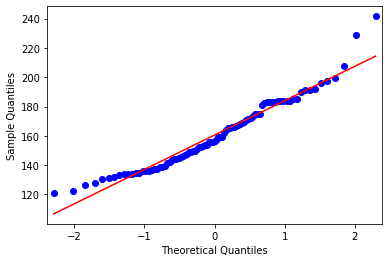

In [6]:
#plot both datasets using qqplot to check for normality
qqplot(Organic_Session_Duration, line='s')
pyplot.show()

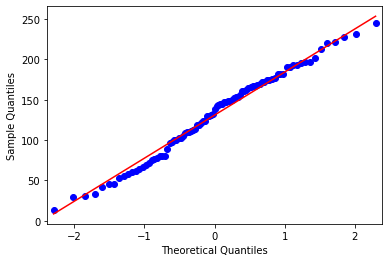

In [7]:
qqplot(Paid_Session_Duration, line='s')
pyplot.show()

### Not both datasets look normal since the firsts falls off the qq plot

In [8]:
# normality test with Shapiro
stat, p = shapiro(Organic_Session_Duration)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.954, p=0.003
Sample does not look Gaussian (reject H0)


In [9]:
stat, p = shapiro(Paid_Session_Duration)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.983, p=0.277
Sample looks Gaussian (fail to reject H0)


### Since not both datasets are normaly distributed non-parametric tests should be used.

In [10]:
#import ranksums (Wilcoxon-Mann-Whitney (WMW) rank sum test) to test wether the difference between the two datasets is significant
from scipy.stats import ranksums

In [12]:
stat, p =  ranksums(Organic_Session_Duration,Paid_Session_Duration)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The difference between the two datasets is not significant (fail to reject H0)')
else:
	print('The difference between the two datasets is significant (reject H0)')

Statistics=3.828, p=0.000
The difference between the two datasets is significant (reject H0)


## We conclude that there is significant difference between the two datasets